In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-02-19 12:05:03.521678'

In [3]:
canadian_rivers = pd.DataFrame({})

for dirpath, dirnames, filenames in os.walk("../Loadings Canada Chloride/Rivers/."):
    for filename in [f for f in filenames if f.endswith(".csv") and f.startswith("Flow")]:
        river = pd.read_csv(os.path.join(dirpath, filename))
        river[river.columns[0]] = pd.to_datetime(river[river.columns[0]], errors='coerce')
        river[filename[5:-8]] = river['Flow, CFS']*0.0283168
        river.set_index(river.columns[0], inplace=True)
        river = river[filename[5:-8]]
        canadian_rivers = canadian_rivers.join(river, how='outer')

In [4]:
us_rivers = pd.DataFrame({})

for dirpath, dirnames, filenames in os.walk("../Loadings US Chloride/Rivers/."):
    for filename in [f for f in filenames if f.endswith(".csv") and f.startswith("Flow")]:
        river = pd.read_csv(os.path.join(dirpath, filename))
        river[river.columns[0]] = pd.to_datetime(river[river.columns[0]], errors='coerce')
        river[filename[5:-8]] = river['Flow, CFS']*0.0283168
        river.set_index(river.columns[0], inplace=True)
        river = river[filename[5:-8]]
        us_rivers = us_rivers.join(river, how='outer')



In [5]:
rivers = {'ca': {'clair': ['Thames_R', 'Sydenham_R', 'Ruscom_R'],
                'eastern': ['Grand_R', 'Nanticoke_R', 'Lynn_R', 'Big_R'],
                'central': ['Big_Otter_R', 'Kettle_R'],
                'western': ['Turkey_R', 'Canard_R']},
          'us': {'clair': ['Clinton_R', 'Belle_R', 'Black_R_MI'], 
                 'eastern': ['Cattaraugus_R', 'Buffalo_R'],
                'central': ['Sandusky_R', 'Black_OH_R', 'Vermilion_R', 'Black_OH_R', 'Rocky_R', 'Cuyahoga_R', 
                            'Chagrin_R', 'Grand_OH_R', 'Conneaut_R'],
                'western': ['Rouge_R', 'Huron_MI_R', 'Raisin_R', 'Maumee_R', 'Portage_R']}}

In [6]:
sorted(canadian_rivers.columns)

['Big_Otter_R',
 'Big_R',
 'Canard_R',
 'Grand_R',
 'Kettle_R',
 'Lynn_R',
 'Nanticoke_R',
 'Niagara_R',
 'Ruscom_R',
 'St_Clair_R',
 'Sydenham_R',
 'Thames_R',
 'Turkey_R']

In [7]:
sorted(us_rivers.columns)

['Belle_R',
 'Black_OH_R',
 'Black_R_MI',
 'Buffalo_R',
 'Cattaraugus_R',
 'Chagrin_R',
 'Clinton_R',
 'Conneaut_R',
 'Cuyahoga_R',
 'Detroit_R',
 'Grand_OH_R',
 'Huron_MI_R',
 'Huron_OH_R',
 'Maumee_R',
 'Portage_R',
 'Raisin_R',
 'Rocky_R',
 'Rouge_R',
 'Sandusky_R',
 'Vermilion_R']

In [8]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
#     cumsum_vec = np.cumsum(np.insert(interval, 0, 0)) 
#     return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

In [9]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600


In [10]:
pd.read_csv('../../measurements/NOAA/summary_eri.csv', skiprows=7).columns

Index(['Date      ', 'OvrLkRunof', 'OvrLkPrecp', ' Evaporatn', 'NetBsnSupl',
       'OvrLdRunof', 'OvrLdPrecp', 'OvrLkATMin', 'OvrLkATMax', 'OvrLkATAvg',
       'OvrLkDewpt', 'OvrLkWndSp', 'OvrLkCloud', 'OvrLdATMin', 'OvrLdATMax',
       'OvrLdATAvg', 'OvrLdDewpt', 'OvrLdWndSp', 'OvrLdCloud', 'UprSoilMst',
       'LwrSoilMst', 'GroundWatr', 'SurfaceSto', 'SnowWatrEq', ' WaterTemp',
       '   IceArea', '  IceDepth', '   IceTemp', 'ReflectRad', ' LatentRad',
       'SensiblRad', ' Advection', 'IncidntRad', '  NetLWRad', ' TotalHeat'],
      dtype='object')

In [11]:
noaa_tim = pd.read_csv('../../measurements/NOAA/summary_eri.csv', skiprows=7)
noaa_tim = noaa_tim.drop(noaa_tim.index[0])

noaa_tim['Date      '] = pd.to_datetime(noaa_tim['Date      '], errors='coerce')
noaa_tim = noaa_tim.set_index('Date      ')

noaa_tim['OvrLkRunof'] = pd.to_numeric(noaa_tim['OvrLkRunof'], errors='coerce')
noaa_tim['OvrLkPrecp'] = pd.to_numeric(noaa_tim['OvrLkPrecp'], errors='coerce')
noaa_tim[' Evaporatn'] = pd.to_numeric(noaa_tim[' Evaporatn'], errors='coerce')
noaa_tim['OvrLkATAvg'] = pd.to_numeric(noaa_tim['OvrLkATAvg'], errors='coerce')
noaa_tim['OvrLdRunof'] = pd.to_numeric(noaa_tim['OvrLdRunof'], errors='coerce')

noaa_tim_monthly = noaa_tim.groupby(pd.Grouper(freq='M')).mean()

noaa_tim_yearly = noaa_tim.groupby(pd.Grouper(freq='Y')).mean()

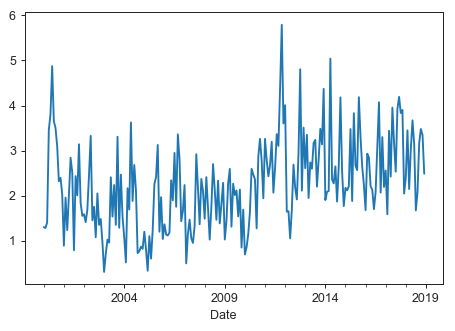

In [12]:
noaa_tim_monthly.OvrLkPrecp.plot()

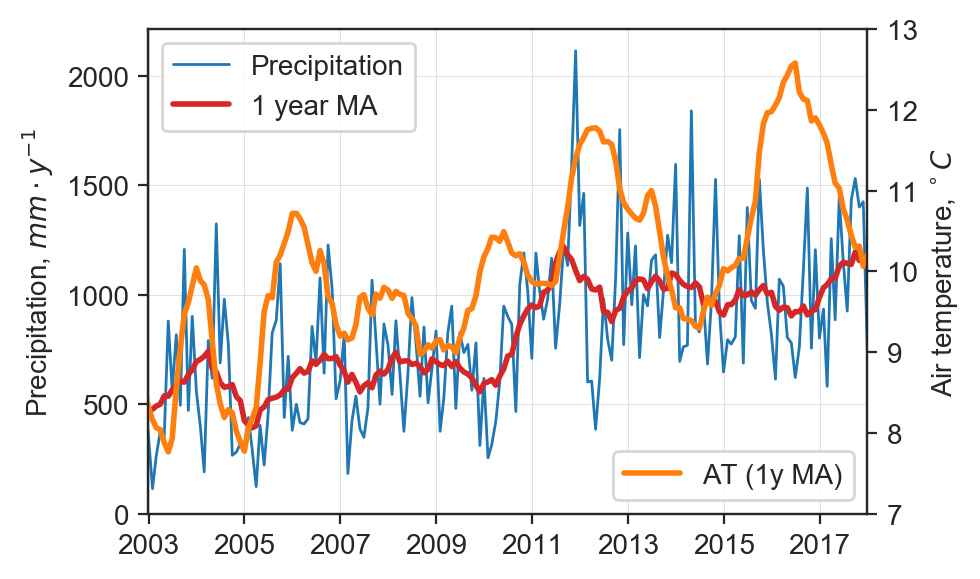

In [13]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365, lw=1, ls='-', label='Precipitation',c=sns.color_palette()[0])
# axes.plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes.plot(noaa_tim_monthly.OvrLkPrecp.index, 365*movingaverage(noaa_tim_monthly.OvrLkPrecp, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


ax2 = axes.twinx()
# ax2.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkATAvg), lw=0.5, ls='-', label='Air temperature',c=sns.color_palette()[2])
ax2.plot(noaa_tim_monthly.index, movingaverage(noaa_tim_monthly.OvrLkATAvg,12), lw=2, ls='-', label='AT (1y MA)',c=sns.color_palette()[1])
ax2.set_ylim(7,13)
ax2.set_ylabel('Air temperature, $^\circ C$')
ax2.legend(loc=4)


# axes.plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes.plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes.plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes.axhline(y=0, c='k', ls='-.', lw=0.3)




axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=2)
axes.set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()
axes.set_xlabel('')
axes.grid(lw=0.2)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precipitation_recent.pdf')

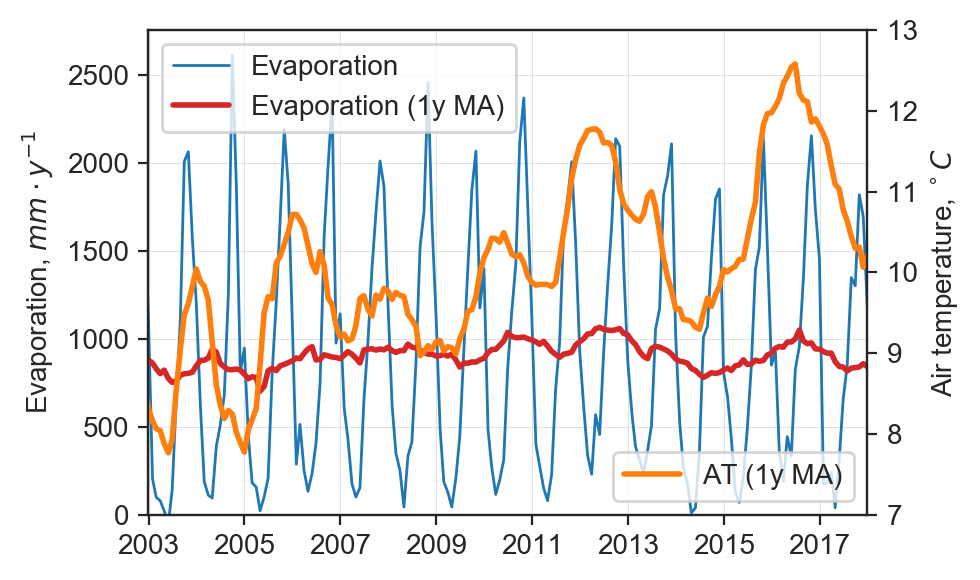

In [14]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly[' Evaporatn'])*365, lw=1, ls='-', label='Evaporation',c=sns.color_palette()[0])
# axes.plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes.plot(noaa_tim_monthly.OvrLkPrecp.index, 365*movingaverage(noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='Evaporation (1y MA)')

ax2 = axes.twinx()
# ax2.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkATAvg), lw=0.5, ls='-', label='Air temperature',c=sns.color_palette()[2])
ax2.plot(noaa_tim_monthly.index, movingaverage(noaa_tim_monthly.OvrLkATAvg,12), lw=2, ls='-', label='AT (1y MA)',c=sns.color_palette()[1])
ax2.set_ylim(7,13)
ax2.set_ylabel('Air temperature, $^\circ C$')
ax2.legend(loc=4)


axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=2)
axes.set_ylabel('Evaporation, $mm\cdot y^{-1}$')


handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/evap_recent.pdf')






In [15]:
gauged_area = 0.75

In [93]:
runoff = (runoff_ca+us_monthly)/gauged_area

In [94]:
runoff = runoff.to_frame()

In [95]:
runoff.index = pd.to_datetime(runoff.index, errors='coerce')

In [96]:
runoff['month'] = runoff.index.month
runoff['year'] = runoff.index.year
runoff['till2010'] = (runoff.index.year < 2011)

In [97]:
runoff = runoff.rename(index=str, columns={0: 'Runoff'})

In [98]:
runoff['Runoff'] = pd.to_numeric(runoff['Runoff'], errors='coerce')

In [99]:
runoff[runoff['till2010']].describe()['Runoff'].loc['mean']

855.0439887637935

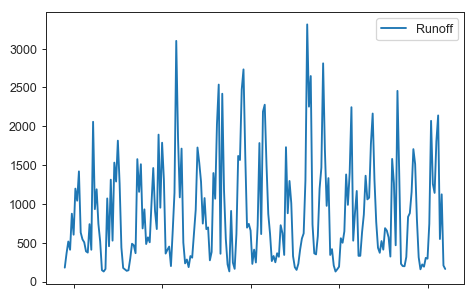

In [100]:
runoff.plot(y=0)

In [110]:
sum(1/12*runoff_av[runoff_av.till2010][0])/sum(1/12*runoff_av[~runoff_av.till2010][0])

KeyError: 0

In [111]:
noaa_tim_monthly

,OvrLkRunof,OvrLkPrecp,Evaporatn,OvrLdRunof,OvrLkATAvg,month,year,till2010
Date,,,,,,,,
2000-01-31,1.410323,1.305484,1.641290,0.591613,-2.061613,1,2000,True
2000-02-29,2.332414,1.283793,0.564828,0.978276,-0.442069,2,2000,True
2000-03-31,1.674839,1.406774,0.353226,0.701613,3.018387,3,2000,True
2000-04-30,3.483667,3.457333,0.611000,1.461667,6.195667,4,2000,True
2000-05-31,2.759032,3.804516,0.821290,1.156774,13.419032,5,2000,True
2000-06-30,2.818333,4.872667,1.322667,1.181333,18.827333,6,2000,True
2000-07-31,1.132258,3.652903,2.772581,0.475806,21.717742,7,2000,True
2000-08-31,1.106452,3.505161,3.661935,0.463871,22.619032,8,2000,True
2000-09-30,1.588333,3.099000,6.789000,0.666000,19.958667,9,2000,True


In [112]:
noaa_tim_monthly['month'] = noaa_tim_monthly.index.month
noaa_tim_monthly['year'] = noaa_tim_monthly.index.year
noaa_tim_monthly['till2010'] = (noaa_tim_monthly.index.year < 2011)

In [113]:
noaa_tim_monthly.groupby(['till2010']).describe()

Evaporatn                                                           \
              count      mean       std    min       25%       50%       75%   
till2010                                                                       
False          96.0  2.478143  1.761817  0.027  0.899677  2.316935  3.982605   
True          132.0  2.483095  2.013778 -0.150  0.674677  1.834194  3.875242   

                   OvrLdRunof                                          \
               max      count      mean       std       min       25%   
till2010                                                                
False     5.897097       96.0  0.519027  0.326606  0.083871  0.260565   
True      7.177419      132.0  0.621026  0.368260  0.080645  0.316298   

                                       OvrLkATAvg                       \
               50%       75%       max      count       mean       std   
till2010                                                                 
False     0.443710  0.691895  1.623871       96.0  10.767768  8.872535   
True      0.559677  0.919194  1.557857      132.0   9.723180  9.261597   

                                                               OvrLkPrecp  \
                min       25%        50%        75%        max      count   
till2010                                                                    
False     -6.130000  2.510323  10.972349  19.314833  24.800968       96.0   
True     -10.783548  1.622097   9.553478  18.673417  24.158065      132.0   

                                                                      \
              mean       std       min       25%       50%       75%   
till2010                                                               
False     2.831735  0.865864  1.055333  2.145242  2.659575  3.354113   
True      1.839703  0.835404  0.311935  1.202339  1.716500  2.367438   

                   OvrLkRunof                                          \
               max      count      mean       std       min       25%   
till2010                                                                
False     5.789333       96.0  1.238083  0.779047  0.198710  0.623212   
True      4.872667      132.0  1.481476  0.878353  0.192903  0.754581   

                                        month                                 \
               50%       75%       max  count mean       std  min   25%  50%   
till2010                                                                       
False     1.058710  1.649855  3.874194   96.0  6.5  3.470174  1.0  3.75  6.5   
True      1.334839  2.191048  3.716786  132.0  6.5  3.465203  1.0  3.75  6.5   

                       year                                             \
           75%   max  count    mean       std     min      25%     50%   
till2010                                                                 
False     9.25  12.0   96.0  2014.5  2.303316  2011.0  2012.75  2014.5   
True      9.25  12.0  132.0  2005.0  3.174324  2000.0  2002.00  2005.0   

                           
              75%     max  
till2010                   
False     2016.25  2018.0  
True      2008.00  2010.0

In [114]:
2.831735/1.839703

1.539234865627767

In [115]:
runoff

,Runoff,month,year,till2010
2003-01-31,467.004774,1,2003,True
2003-02-28,364.448895,2,2003,True
2003-03-31,1576.062929,3,2003,True
2003-04-30,1155.174392,4,2003,True
2003-05-31,1510.463837,5,2003,True
2003-06-30,683.941779,6,2003,True
2003-07-31,929.234821,7,2003,True
2003-08-31,482.599198,8,2003,True
2003-09-30,568.960215,9,2003,True
2003-10-31,505.143785,10,2003,True


In [116]:
runoff_av

Runoff  month    year  till2010
till2010                                         
False    1   1180.951451    1.0  2014.5     False
         2   1010.645025    2.0  2014.5     False
         3   1749.136184    3.0  2014.5     False
         4   1655.945955    4.0  2014.5     False
         5   1187.046564    5.0  2014.5     False
         6    843.953233    6.0  2014.5     False
         7    680.403665    7.0  2014.5     False
         8    265.993797    8.0  2014.5     False
         9    311.241196    9.0  2014.5     False
         10   549.752758   10.0  2014.5     False
         11   687.311221   11.0  2014.5     False
         12  1175.134400   12.0  2014.0     False
True     1   1442.002064    1.0  2006.5      True
         2   1222.658197    2.0  2006.5      True
         3   1874.571404    3.0  2006.5      True
         4   1217.455111    4.0  2006.5      True
         5   1035.309188    5.0  2006.5      True
         6    687.242531    6.0  2006.5      True
         7    455.599159    7.0  2006.5      True
         8    374.759276    8.0  2006.5      True
         9    347.249094    9.0  2006.5      True
         10   426.032123   10.0  2006.5      True
         11   673.799356   11.0  2006.5      True
         12  1279.183006   12.0  2006.5      True

Text(0,0.5,'Runoff, $mm\\cdot month^{-1}$')

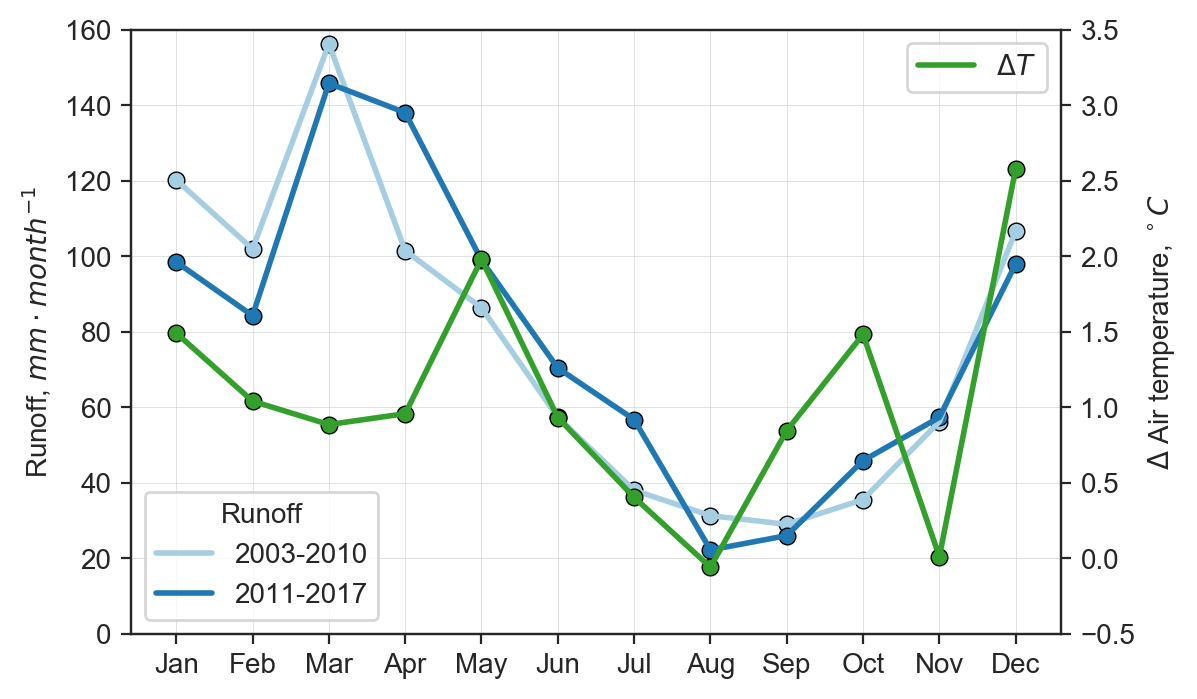

In [117]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=3,markerfacecolor=sns.color_palette()[3])

f, ax = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
# sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff, linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, showmeans=False)
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(0,11,12), [m[:3] for m in months])
ax.plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0],lw=2)
ax.plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1],lw=2)
ax.scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0], edgecolors='k',lw=0.5)
ax.scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1], edgecolors='k',lw=0.5)

ax2 = ax.twinx()
ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, 
         lw=2, ls='-',c=sns.color_palette("Paired", 6)[3], label='$\delta T$')
# ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, lw=1, ls='-', c=sns.color_palette("Paired", 6)[3], label='2011')
ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3], edgecolors='k',lw=0.5)
# ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3],)
ax2.set_ylim(-0.5,3.5)
ax2.set_ylabel('$\Delta$ Air temperature, $^\circ C$')
ax2.legend(['$\Delta T$'],loc=1)
# ax2.set_ylim(-10,25)

# ax.set_ylim(0,None)
# ax.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# ax.legend(loc=1)
# ax.set_ylabel('Evaporation, $mm\cdot y^{-1}$')


ax.set_ylim(0,160)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['2003-2010', '2011-2017'], title="Runoff", loc=3)
ax.grid(lw=0.2)
ax.set_xlabel('')
ax.set_ylabel('Runoff, $mm\cdot month^{-1}$')

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_lineplot_dT_recent.pdf')


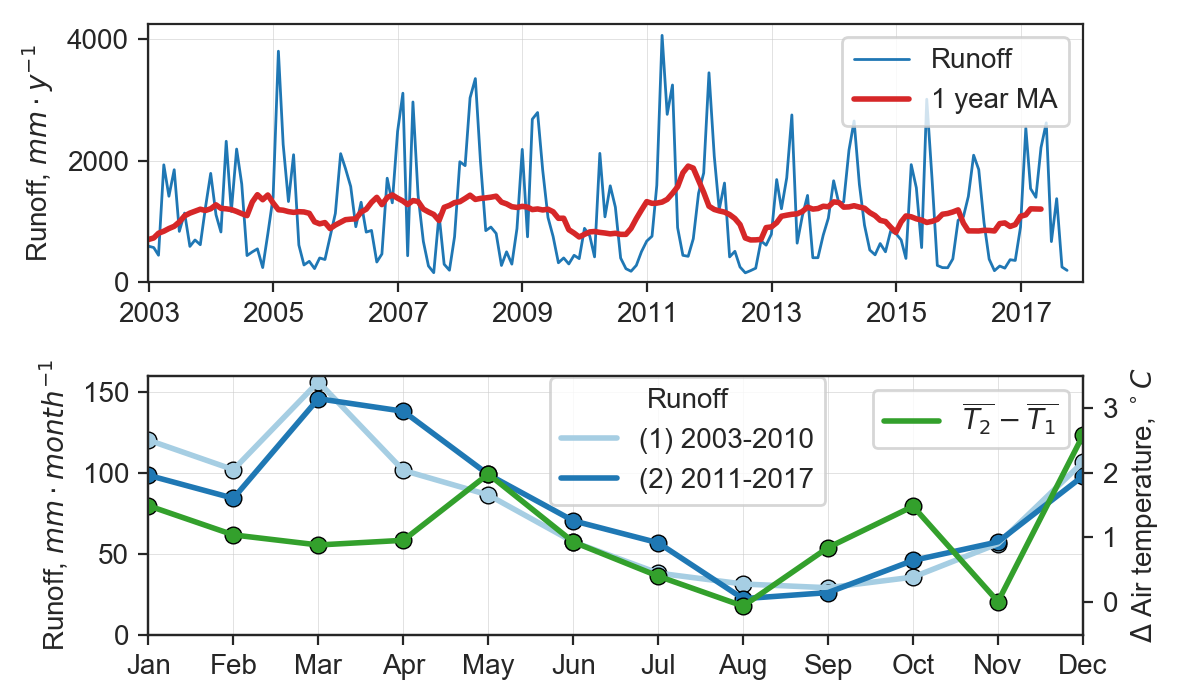

In [118]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=3,markerfacecolor=sns.color_palette()[3])

f, axes = plt.subplots(2,1, figsize=(6,3.6), dpi=200, sharex=False)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
# sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff, linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, showmeans=False)
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']

axes[1].plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0],lw=2)
axes[1].plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1],lw=2)
axes[1].scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0], edgecolors='k',lw=0.5)
axes[1].scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1], edgecolors='k',lw=0.5)

ax2 = axes[1].twinx()
ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, 
         lw=2, ls='-',c=sns.color_palette("Paired", 6)[3], label='$\delta T$')
# ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, lw=1, ls='-', c=sns.color_palette("Paired", 6)[3], label='2011')
ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3], edgecolors='k',lw=0.5)
# ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3],)
ax2.set_ylim(-0.5,3.5)
ax2.set_ylabel('$\Delta$ Air temperature, $^\circ C$')
ax2.legend(['$\overline{T_2} - \overline{T_1}$'],loc=1)
# ax2.set_ylim(-10,25)

# axes[1].set_ylim(0,None)
# axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(loc=1)
# axes[1].set_ylabel('Evaporation, $mm\cdot y^{-1}$')


axes[1].set_ylim(0,160)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['(1) 2003-2010', '(2) 2011-2017'], title="Runoff", loc=(0.43,0.5))
axes[1].grid(lw=0.2)
axes[1].set_xlabel('')
axes[1].set_ylabel('Runoff, $mm\cdot month^{-1}$')

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_lineplot_dT_recent.pdf')

axes[0].plot((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/gauged_area, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
# axes[0].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes[0].plot((runoff_ca+us_monthly).index, movingaverage((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/0.75, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(0,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(loc=1)
axes[0].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()
axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes[1].set_xticks(np.linspace(0,11,12), )
axes[1].set_xticklabels([m[:3] for m in months])
axes[1].set_xlim(0,11)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_combo_recent.pdf')


In [119]:
runoff.index = pd.to_datetime(runoff.index, errors='coerce')

runoff = runoff[runoff.index.year>2002]
runoff_av = runoff[runoff.index.year>2002].groupby([runoff[runoff.index.year>2002].till2010, runoff[runoff.index.year>2002].index.month]).mean()


NameError: name 'runoff_av' is not defined

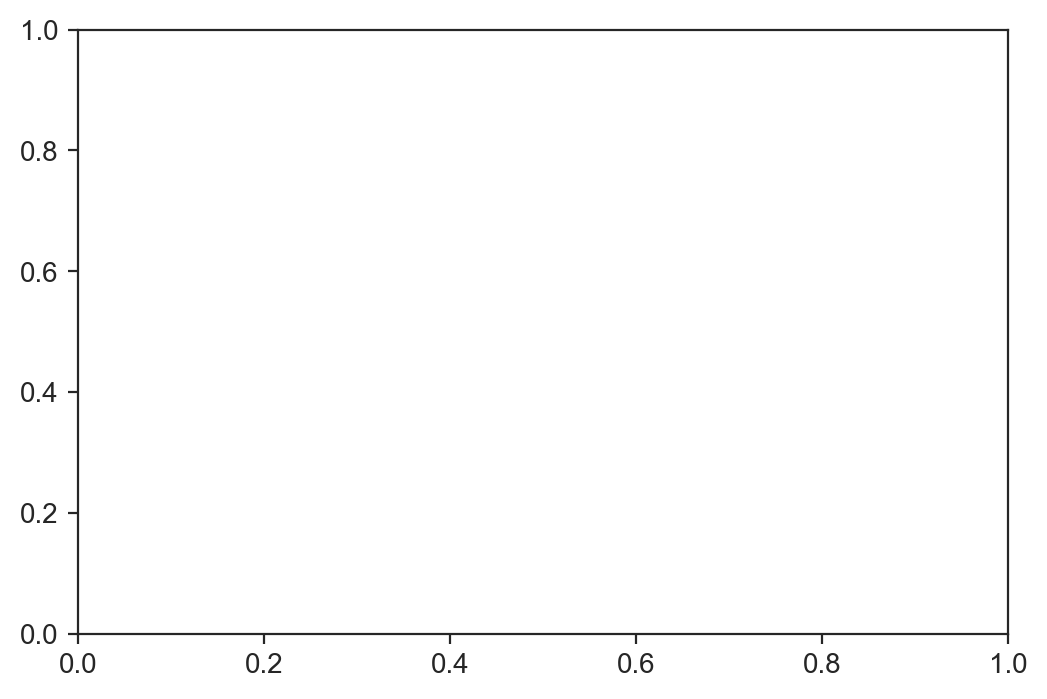

In [33]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])

f, ax = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
ax.plot(runoff_av[runoff_av.till2010].month-1, runoff_av[runoff_av.till2010][0])
ax.plot(runoff_av[runoff_av.till2010].month-1, runoff_av[~runoff_av.till2010][0])
# ax=sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff[runoff.index.year>2002], linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, )
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(0,11,12), [m[:3] for m in months])
plt.xlim(0,11)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['2003-2010', '2011-2017'], title="Years", loc=1)
ax.grid(lw=0.2)
ax.set_xlabel('')
ax.set_ylabel('Runoff, $mm\cdot y^{-1}$')

In [34]:
runoff

NameError: name 'runoff' is not defined

NameError: name 'runoff_ca' is not defined

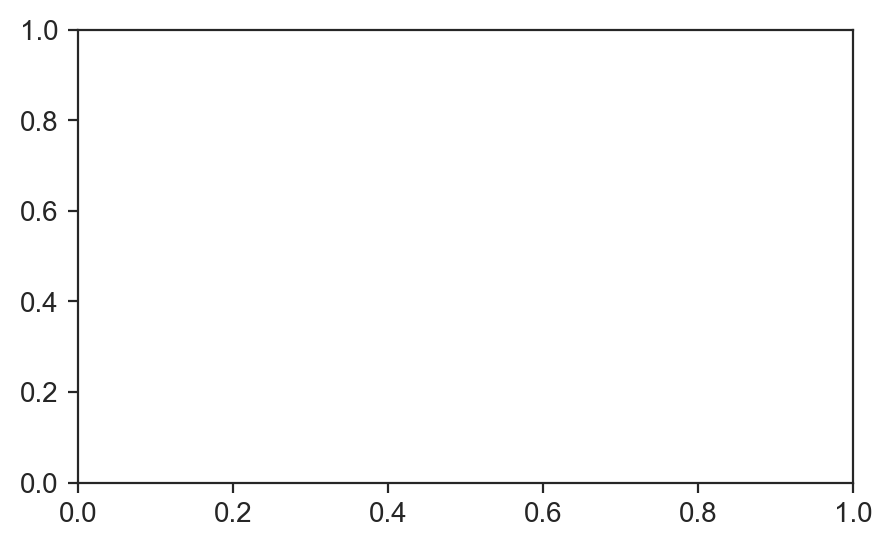

In [35]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkRunof+noaa_tim_monthly.OvrLdRunof)*365, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
axes.plot((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/gauged_area, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
# axes.plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes.plot((runoff_ca+us_monthly).index, movingaverage((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/0.75, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


# axes.plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes.plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes.plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes.axhline(y=0, c='k', ls='-.', lw=0.3)

axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=1)
axes.set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()
axes.set_xlabel('')
axes.grid(lw=0.2)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_recent.pdf')




In [92]:
# canadian_rivers.columns

# us_monthly.columns

us_monthly = us_rivers.groupby(pd.Grouper(freq='M')).mean()

cr_monthly = canadian_rivers.groupby(pd.Grouper(freq='M')).mean()

runoff_ca = cr_monthly.sum(axis=1) - cr_monthly['Niagara_R'] - cr_monthly['St_Clair_R']

us_monthly = us_monthly.sum(axis=1) - us_monthly['Detroit_R']

noaa_tim_yearly[3:-1].T*365*conversion_fac_mmy_to_cms_eastern

Date,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
OvrLkRunof,123.418525,104.155646,104.129861,105.288978,108.417935,135.340063,112.892256,79.514520,152.264970,84.351542,103.174521,79.080673,65.412300,75.827233,114.428250
OvrLkPrecp,127.824921,127.108565,115.451516,153.925859,131.536723,150.078966,141.916185,159.664472,262.045798,202.068290,237.338429,209.458279,221.656393,201.421483,251.173329
Evaporatn,166.816375,184.171831,182.905965,193.868271,206.574730,208.059999,189.711666,222.592012,196.657601,230.016485,209.988537,171.465988,188.219495,230.154150,179.676214
OvrLdRunof,51.748310,43.670420,43.636685,44.145031,45.442190,56.724565,47.304665,33.353634,63.836866,35.358072,43.246661,33.147666,27.446303,31.772225,47.970773
OvrLkATAvg,690.485081,657.518980,778.457426,825.965868,770.790604,748.576778,748.432144,823.312389,819.677277,931.146886,869.968474,766.449943,860.509294,979.535067,854.498979


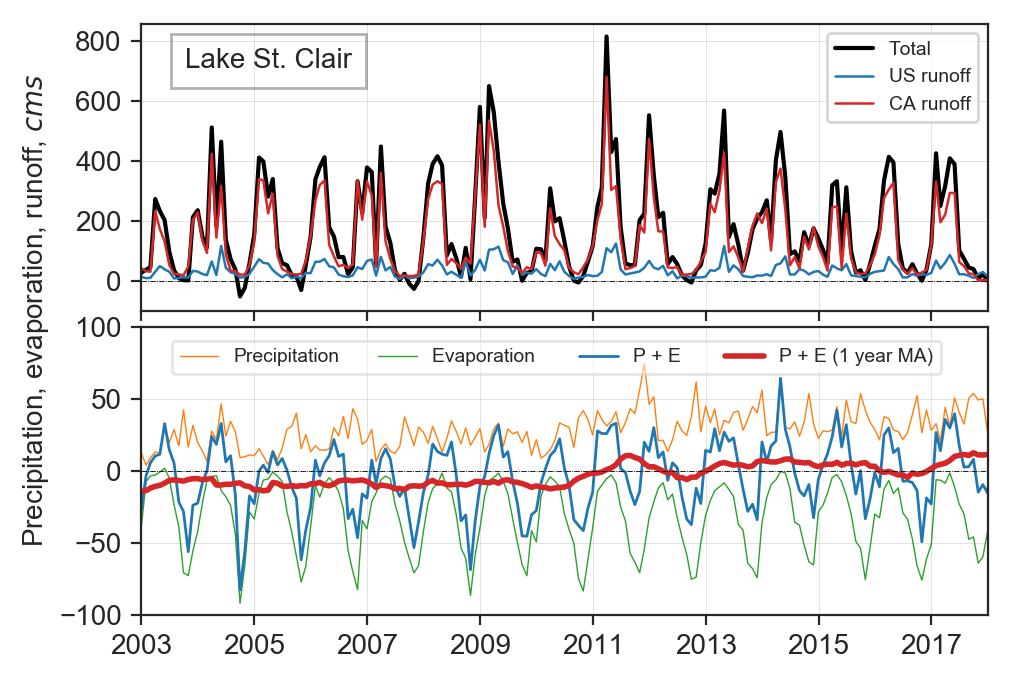

In [122]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(pd.concat([us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,
    canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,
    (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair], axis=1).sum(axis=1) , lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-100,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_st_clair*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)


axes[0].text(0.15, 0.87,'Lake St. Clair',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))


axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical', )


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small', )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-100,100)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.12)
plt.gcf().subplots_adjust(left=0.12)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_st_clair.pdf', dpi=f.dpi)

In [38]:
total_eastern = us_rivers[rivers['us']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + canadian_rivers[rivers['ca']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern
#  +
# 

# Eastern 

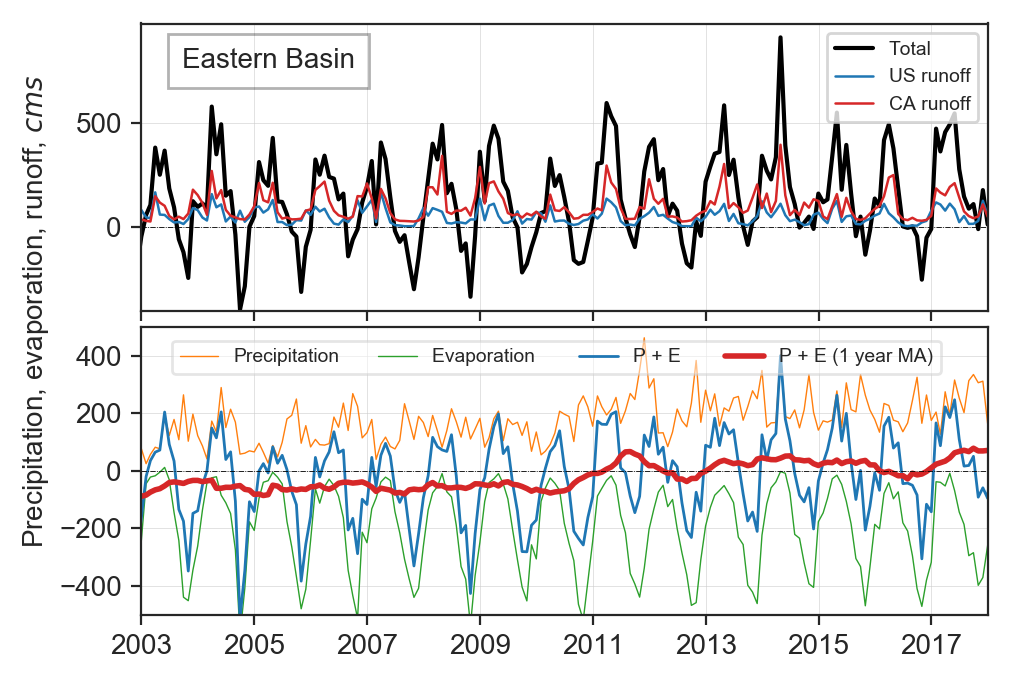

In [39]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(total_eastern, lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-400,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_eastern, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_eastern*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)
axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].text(0.15, 0.87,'Eastern Basin',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))

axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical', )


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-500,500)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.1)
plt.gcf().subplots_adjust(left=0.12)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_eastern.pdf', dpi=f.dpi)



# Central

In [40]:
total_central = us_rivers[rivers['us']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
canadian_rivers[rivers['ca']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central
#  +
# 

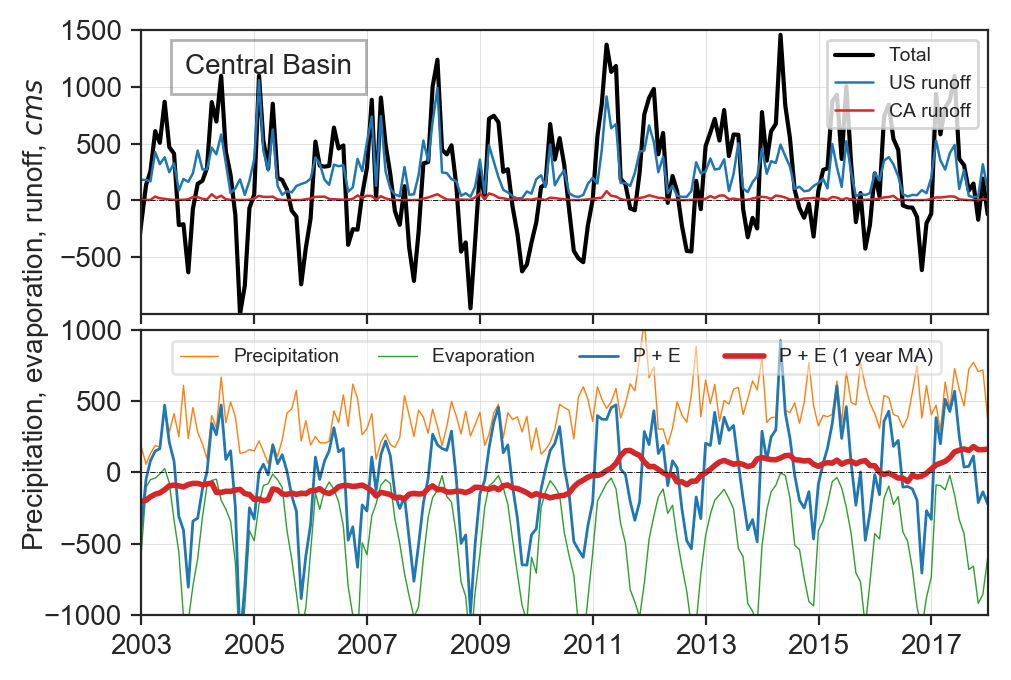

In [41]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(total_central, lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-1000,1500)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes[0].set_yticks(np.linspace(-500,1500, 5))


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_central, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_central*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)
axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)



axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical', )

axes[0].text(0.15, 0.87,'Central Basin',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))

handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-1000,1000)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.1)
plt.gcf().subplots_adjust(left=0.12)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_central.pdf', dpi=f.dpi)



# Western 

In [42]:
total_western = us_rivers[rivers['us']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
canadian_rivers[rivers['ca']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western
#  +
# 

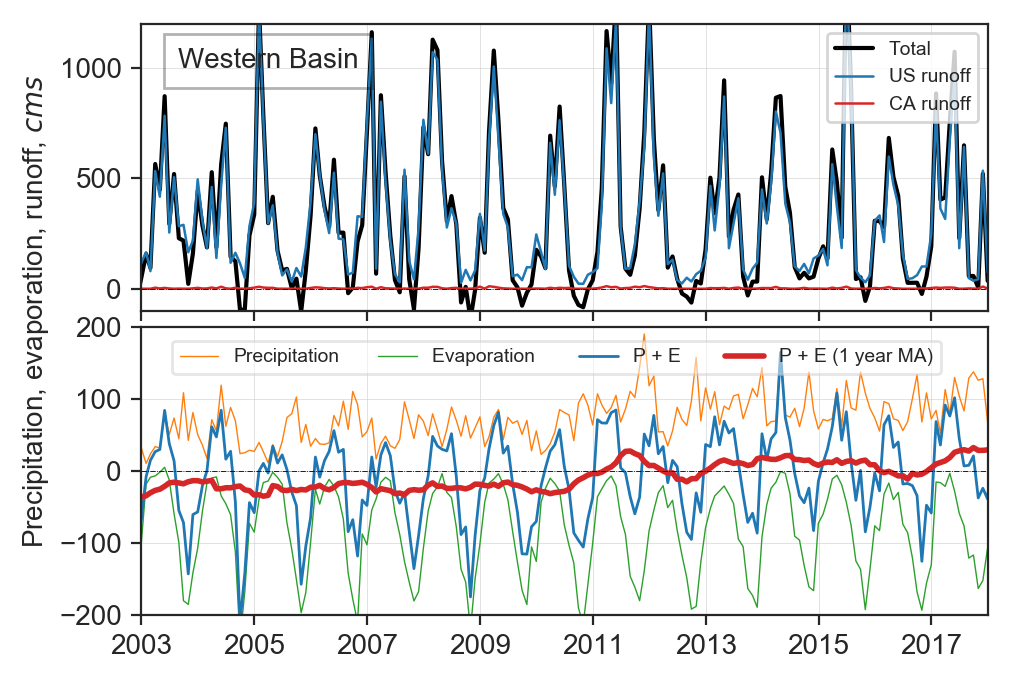

In [43]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(total_western, lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-100,1200)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_western, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_western*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)
axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)


axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical')

axes[0].text(0.15, 0.87,'Western Basin',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))

handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-200,200)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.1)
plt.gcf().subplots_adjust(left=0.12)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_western.pdf', dpi=f.dpi)



# ERA 5

In [65]:
StClair_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_StClair.csv')
CentralBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_CentralBasin.csv')
EasternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_EasternBasin.csv')
WesternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_WesternBasin.csv')

StClair_ERA5['evap'] = -StClair_ERA5['evap']
CentralBasin_ERA5['evap'] = -CentralBasin_ERA5['evap']
EasternBasin_ERA5['evap'] = -EasternBasin_ERA5['evap']
WesternBasin_ERA5['evap'] = -WesternBasin_ERA5['evap']

StClair_ERA5['precip'] = pd.to_numeric(StClair_ERA5['precip'], errors='coerce')


StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')


# CentralBasin_ERA5.describe()

for c in StClair_ERA5.columns[1:]:
    StClair_ERA5[c] = StClair_ERA5[c] * (StClair_ERA5[c] > 0)

StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')
StClair_ERA5['year'] = StClair_ERA5.date.dt.year

StClair_ERA5['precip'] = StClair_ERA5['precip'] * (StClair_ERA5['precip'] < 300)
# StClair_ERA5['precip']

# StClair_ERA5 = StClair_ERA5.groupby(['year']).mean()

StClair_ERA5['precip'] = StClair_ERA5['precip']*365

StClair_ERA5['evap'] = StClair_ERA5['evap']*365
StClair_ERA5['surf_runoff'] = StClair_ERA5['evap']*365

StClair_ERA5

for c in WesternBasin_ERA5.columns[1:]:
    WesternBasin_ERA5[c] = WesternBasin_ERA5[c] * (WesternBasin_ERA5[c] > 0)

WesternBasin_ERA5['date'] = pd.to_datetime(WesternBasin_ERA5['date'], errors='coerce')
WesternBasin_ERA5['year'] = WesternBasin_ERA5.date.dt.year
WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip'] * (WesternBasin_ERA5['precip'] < 300)
# WesternBasin_ERA5 = WesternBasin_ERA5.groupby(['year']).mean()

WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip']*365

WesternBasin_ERA5['evap'] = WesternBasin_ERA5['evap']*365
WesternBasin_ERA5['surf_runoff'] = WesternBasin_ERA5['surf_runoff']*365

WesternBasin_ERA5

CentralBasin_ERA5['date'] = pd.to_datetime(CentralBasin_ERA5['date'], errors='coerce')
CentralBasin_ERA5['year'] = CentralBasin_ERA5.date.dt.year
CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip'] * (CentralBasin_ERA5['precip'] < 300)
# CentralBasin_ERA5 = CentralBasin_ERA5.groupby(['year']).mean()

CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip']*365

CentralBasin_ERA5['evap'] = CentralBasin_ERA5['evap']*365
CentralBasin_ERA5['surf_runoff'] = CentralBasin_ERA5['surf_runoff']*365

CentralBasin_ERA5

EasternBasin_ERA5['date'] = pd.to_datetime(EasternBasin_ERA5['date'], errors='coerce')
EasternBasin_ERA5['year'] = EasternBasin_ERA5.date.dt.year
EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip'] * (EasternBasin_ERA5['precip'] < 300)
# EasternBasin_ERA5 = EasternBasin_ERA5.groupby(['year']).mean()

EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip']*365

EasternBasin_ERA5['evap'] = EasternBasin_ERA5['evap']*365
EasternBasin_ERA5['surf_runoff'] = EasternBasin_ERA5['surf_runoff']*365



In [66]:
EasternBasin_ERA5

,date,precip,cloud,evap,surf_runoff,year
0,2002-01-01,8.162519e+02,0.716296,973.737931,0.000000e+00,2002
1,2002-01-02,7.676397e+01,0.401624,817.653784,-1.519618e-11,2002
2,2002-01-03,3.936256e+01,0.823043,809.143130,0.000000e+00,2002
3,2002-01-04,4.097966e+01,0.768728,980.536238,3.039236e-11,2002
4,2002-01-05,5.293678e+01,0.911535,939.768763,1.503841e-01,2002
5,2002-01-06,1.647618e+03,0.983722,399.181896,8.776862e-01,2002
6,2002-01-07,1.688684e+03,0.914706,560.774542,6.379837e-02,2002
7,2002-01-08,2.676529e+01,0.833909,988.170834,-1.519618e-11,2002
8,2002-01-09,7.151401e+02,0.730232,559.827082,2.225219e+01,2002
9,2002-01-10,1.307918e+01,0.836911,41.052268,2.145450e+01,2002


In [62]:
EasternBasin_ERA5['precip'].values

array([1178.44756916, 1308.05818899, 1380.44162376, 1230.70093578,
       1417.66756474, 1120.44620058, 1455.85745729, 1256.44539378,
       1208.5892989 , 1590.01467173, 1136.97659764, 1377.58733403,
       1217.24333251, 1101.49155274, 1091.95023   , 1289.05524543])

In [80]:
LE_and_StClair_precip = (conversion_fac_mmy_to_cms_st_clair* StClair_ERA5.set_index('date').groupby(pd.Grouper(freq='M')).mean()['precip'] + \
conversion_fac_mmy_to_cms_western * WesternBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='M')).mean()['precip'] + \
conversion_fac_mmy_to_cms_central * CentralBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='M')).mean()['precip'] + \
conversion_fac_mmy_to_cms_eastern * EasternBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='M')).mean()['precip'])/ \
(conversion_fac_mmy_to_cms_st_clair + conversion_fac_mmy_to_cms_eastern + conversion_fac_mmy_to_cms_western + conversion_fac_mmy_to_cms_central)

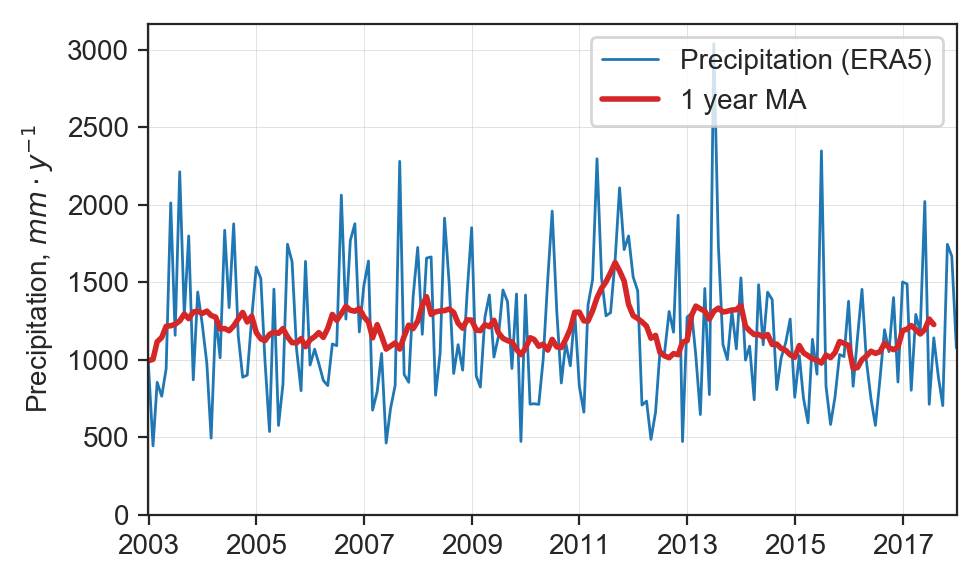

In [123]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')


axes.plot(LE_and_StClair_precip, lw=1, label='Precipitation (ERA5)')
axes.plot(LE_and_StClair_precip.index[5:-5], movingaverage(LE_and_StClair_precip.values,12)[5:-5], lw=2, ls='-', label='1 year MA',c=sns.color_palette()[3])





axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=1)
axes.set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()
axes.set_xlabel('')
axes.grid(lw=0.2)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precipitation_recent_era5.pdf')

In [77]:
(conversion_fac_mmy_to_cms_st_clair* StClair_ERA5.set_index('date').groupby(pd.Grouper(freq='Y')).mean()['precip'] + \
conversion_fac_mmy_to_cms_western * WesternBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='Y')).mean()['precip'] + \
conversion_fac_mmy_to_cms_central * CentralBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='Y')).mean()['precip'] + \
conversion_fac_mmy_to_cms_eastern * EasternBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='Y')).mean()['precip'])/ \
(conversion_fac_mmy_to_cms_st_clair + conversion_fac_mmy_to_cms_eastern + conversion_fac_mmy_to_cms_western + conversion_fac_mmy_to_cms_central)

date
2002-12-31    1075.652944
2003-12-31    1252.226176
2004-12-31    1221.920434
2005-12-31    1147.526602
2006-12-31    1299.767452
2007-12-31    1112.038029
2008-12-31    1325.214360
2009-12-31    1141.680244
2010-12-31    1081.775934
2011-12-31    1559.116691
2012-12-31    1028.340096
2013-12-31    1331.241969
2014-12-31    1095.616782
2015-12-31    1028.252806
2016-12-31    1052.103514
2017-12-31    1232.167295
Freq: A-DEC, Name: precip, dtype: float64

In [49]:
(EasternBasin_ERA5[['precip', 'evap']]*conversion_fac_mmy_to_cms_eastern).T

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
precip,258.215142,286.614729,302.475001,269.664620,310.631750,245.506191,318.999716,275.305609,264.819636,348.395528,249.128244,301.849584,266.715862,241.352950,239.262306,282.450905
evap,220.676160,181.034186,188.952470,203.938743,193.894828,206.357102,203.567763,189.772707,209.886562,185.628968,230.041804,204.015927,149.077939,142.874541,174.871667,162.619743


In [50]:
(CentralBasin_ERA5[['precip', 'evap']]*conversion_fac_mmy_to_cms_central).T

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
precip,539.384722,642.969188,607.729138,585.297265,648.615665,569.219212,666.724782,570.044694,547.163127,804.465915,522.996043,690.786805,548.098296,514.001370,533.107334,624.326203
evap,541.745774,463.587825,472.880919,505.855955,485.711505,523.853508,503.335505,470.470486,520.689874,460.309477,567.958084,504.654500,344.143323,327.201285,402.793305,372.684287


In [51]:
(WesternBasin_ERA5[['precip', 'evap']]*conversion_fac_mmy_to_cms_western).T

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
precip,86.733193,100.117334,94.72501,90.784964,107.508444,98.253675,102.244005,88.463221,80.209511,129.240055,73.629858,101.805274,84.908038,87.730234,88.607366,103.570806
evap,91.111242,84.127854,85.88167,89.751339,89.936134,92.098441,88.716379,86.516059,91.983300,86.621585,98.199319,89.821700,68.337135,67.687470,74.881189,76.418736


In [52]:
(StClair_ERA5[['precip', 'evap']]*conversion_fac_mmy_to_cms_st_clair).T

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
precip,31.759243,36.771688,35.733554,31.557484,40.206160,34.101002,40.665671,38.511692,29.114741,45.738306,30.04362,39.325993,33.372538,32.638868,35.059149,39.041648
evap,31.431497,29.687824,29.468950,31.332080,30.845389,32.190960,30.633520,30.024278,31.774201,29.762008,34.29490,30.644662,23.825113,23.634548,26.036875,25.890111


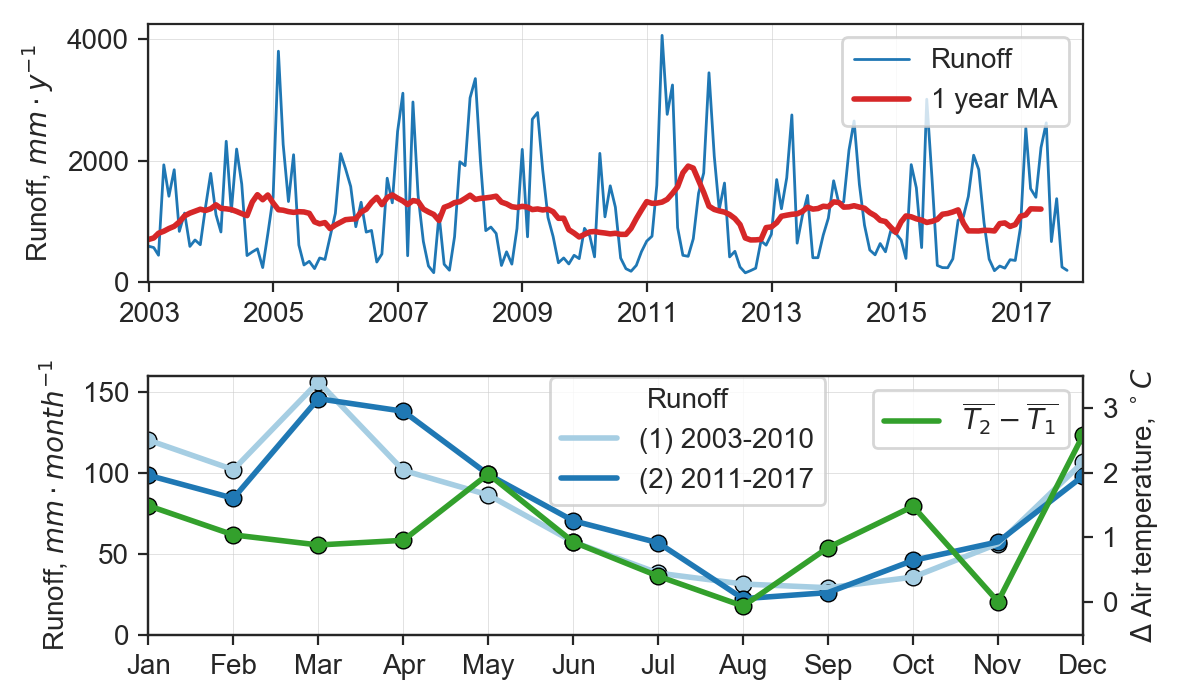

In [120]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=3,markerfacecolor=sns.color_palette()[3])

f, axes = plt.subplots(2,1, figsize=(6,3.6), dpi=200, sharex=False)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
# sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff, linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, showmeans=False)
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']

axes[1].plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0],lw=2)
axes[1].plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1],lw=2)
axes[1].scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0], edgecolors='k',lw=0.5)
axes[1].scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1], edgecolors='k',lw=0.5)

ax2 = axes[1].twinx()
ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, 
         lw=2, ls='-',c=sns.color_palette("Paired", 6)[3], label='$\delta T$')
# ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, lw=1, ls='-', c=sns.color_palette("Paired", 6)[3], label='2011')
ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3], edgecolors='k',lw=0.5)
# ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3],)
ax2.set_ylim(-0.5,3.5)
ax2.set_ylabel('$\Delta$ Air temperature, $^\circ C$')
ax2.legend(['$\overline{T_2} - \overline{T_1}$'],loc=1)
# ax2.set_ylim(-10,25)

# axes[1].set_ylim(0,None)
# axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(loc=1)
# axes[1].set_ylabel('Evaporation, $mm\cdot y^{-1}$')


axes[1].set_ylim(0,160)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['(1) 2003-2010', '(2) 2011-2017'], title="Runoff", loc=(0.43,0.5))
axes[1].grid(lw=0.2)
axes[1].set_xlabel('')
axes[1].set_ylabel('Runoff, $mm\cdot month^{-1}$')

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_lineplot_dT_recent.pdf')

axes[0].plot((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/gauged_area, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
# axes[0].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes[0].plot((runoff_ca+us_monthly).index, movingaverage((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/0.75, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(0,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(loc=1)
axes[0].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()
axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes[1].set_xticks(np.linspace(0,11,12), )
axes[1].set_xticklabels([m[:3] for m in months])
axes[1].set_xlim(0,11)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_combo_recent.pdf')
